In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
from IPython import display

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create Data

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. EDA

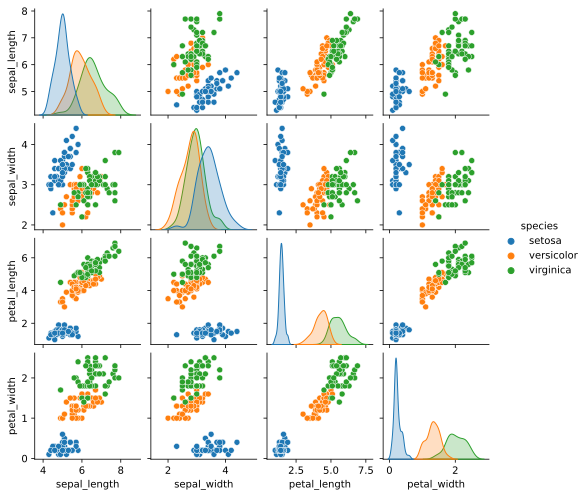

In [9]:
sns.pairplot(data = iris , hue = "species" ,height=1.75,
             aspect=1 )


## 3. Converting to tensor 

In [10]:
num_arr = iris[iris.columns[0:4]].to_numpy()
num_arr

# Another way :  iris[iris.columns[0:4]].values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
torch.float

torch.float32

#### Predictiors or Independent features

In [12]:
data = torch.tensor(num_arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [13]:
labels = np.zeros(shape = len(iris))

In [14]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [16]:
labels[iris["species"] == "versicolor"] = 1

In [17]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [18]:
labels = torch.tensor(labels , dtype = torch.long)

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [19]:
torch.float

torch.float32

In [20]:
torch.int

torch.int32

## 4. Create ANN Model

In [21]:
# output : are numbers (matrix order : no. of instances * no. of neurons in output layers)
# Predictions matrix : 150*3

Lr = 0.01

ANNiris = nn.Sequential(
                       # Input Layer  :  4 -inputs , 64 - Neurons , 64 -outputs
                       nn.Linear(4,64),
                       nn.ReLU(),
                       # hidden Layer  : 64 -inputs , 64 - Neurons , 64 -outputs
                       nn.Linear(64,64),
                       nn.ReLU(),
                       # Output Layer :  64 -inputs , 3 - Neurons , 3 -outputs
                       nn.Linear(64,3)
                       )

# Inbuilt - LogSoftMax(nn.LogSoftmax) function and 
#           NegativeLogLikelihoodLoss(nn.NLLLoss) implementation

# Useful when training a classification problem with `C` classes.
lossfunc = nn.CrossEntropyLoss()

# Optimzer 

optimizer = torch.optim.SGD(params = ANNiris.parameters() , lr = Lr)

## 5. Model Training

In [23]:
numepochs = 1000

#Initialize losses
losses = torch.zeros(numepochs)

ongoingAcc = []

# Loop 
for epochi in range(numepochs):
    
    # Forward Pass 
    y_hat = ANNiris(data)
    
    # Compute Loss
    loss = lossfunc(y_hat ,labels)
    
    losses[epochi] = loss

    # Back-Prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute Accuracy
    
    # Return boolean 
    matches = torch.argmax(y_hat , axis = 1) == labels
    # Converting the boolean to Number
    matches_num = matches.float()
    
    # Accuracy with each iteration
    Accuracy = 100*torch.mean(matches_num)
  
    ongoingAcc.append(Accuracy)
    

# Final Foreward pass
Predictions = ANNiris(data)

predlabels = torch.argmax(Predictions , axis = 1)
total_acc = 100*torch.mean((predlabels == labels.long()).float())

## 6. Visulaize the Results

Total Accuracy Of the Model : 98.66667175292969


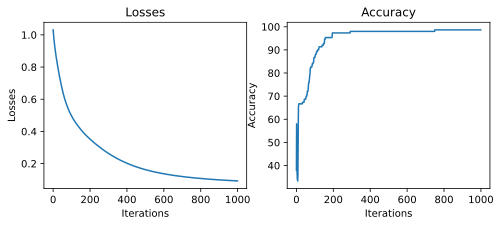

In [24]:
fig ,ax= plt.subplots(nrows = 1 , ncols = 2, figsize=(8, 3) , dpi = 130 )


ax[0].plot(losses.detach())
ax[0].set_ylabel("Losses")
ax[0].set_xlabel("Iterations")
ax[0].set_title("Losses")

ax[1].plot(ongoingAcc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Iterations")
ax[1].set_title("Accuracy")

print(f"Total Accuracy Of the Model : {total_acc}")
plt.show()

In [25]:
y_hat

tensor([[  8.0349,   2.5554, -11.1552],
        [  7.0369,   2.4848, -10.0524],
        [  7.4041,   2.3734, -10.2995],
        [  6.7981,   2.3599,  -9.6537],
        [  8.0923,   2.5136, -11.1644],
        [  8.2195,   2.6989, -11.4645],
        [  7.3711,   2.3342, -10.1996],
        [  7.6380,   2.5200, -10.7036],
        [  6.4788,   2.2670,  -9.2254],
        [  7.1369,   2.4958, -10.1685],
        [  8.4325,   2.6919, -11.7193],
        [  7.2933,   2.4441, -10.2566],
        [  7.0680,   2.4363, -10.0374],
        [  7.1323,   2.1894,  -9.8276],
        [  9.6013,   2.8413, -13.1208],
        [  9.5103,   2.8120, -12.9462],
        [  8.8352,   2.6669, -12.1014],
        [  7.9526,   2.5499, -11.0529],
        [  8.3948,   2.8446, -11.8294],
        [  8.2350,   2.5582, -11.3460],
        [  7.5579,   2.7439, -10.8556],
        [  8.0046,   2.5516, -11.0839],
        [  8.2661,   2.3353, -11.1592],
        [  6.7046,   2.6197,  -9.7974],
        [  6.6696,   2.5127,  -9.6433],


#### Confirming that all Predictions sum to one

In [26]:
# Without Softmax Function
torch.sum(y_hat , axis = 1)

tensor([-0.5649, -0.5306, -0.5220, -0.4957, -0.5585, -0.5461, -0.4943, -0.5457,
        -0.4796, -0.5358, -0.5949, -0.5192, -0.5332, -0.5059, -0.6782, -0.6240,
        -0.5993, -0.5505, -0.5900, -0.5528, -0.5537, -0.5277, -0.5578, -0.4731,
        -0.4611, -0.5137, -0.4932, -0.5682, -0.5756, -0.4970, -0.4958, -0.5572,
        -0.6080, -0.6332, -0.5246, -0.5681, -0.6210, -0.5642, -0.4906, -0.5582,
        -0.5540, -0.4685, -0.4937, -0.4563, -0.4694, -0.5104, -0.5593, -0.5069,
        -0.5829, -0.5531, -0.6479, -0.5227, -0.6068, -0.5125, -0.5920, -0.4401,
        -0.4592, -0.4450, -0.6137, -0.3975, -0.5192, -0.4724, -0.6206, -0.4831,
        -0.4802, -0.6185, -0.3790, -0.5319, -0.6159, -0.5343, -0.3620, -0.5689,
        -0.5470, -0.5004, -0.6030, -0.6165, -0.6439, -0.5474, -0.4730, -0.5404,
        -0.5367, -0.5301, -0.5390, -0.4268, -0.3375, -0.4093, -0.5832, -0.6509,
        -0.4409, -0.4843, -0.4361, -0.4814, -0.5494, -0.4710, -0.4601, -0.4591,
        -0.4582, -0.5571, -0.4649, -0.47

In [27]:
# With Softmax Function
SM = nn.Softmax(1)
torch.sum(SM(y_hat) , axis = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

## 7. Visualize the raw Output

In [28]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

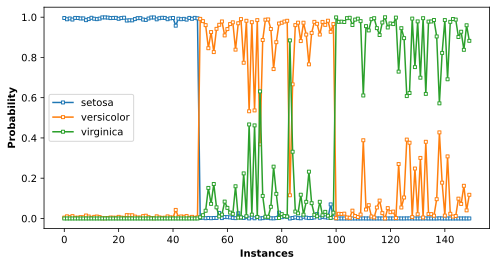

In [29]:
plt.figure(figsize = (8,4) , dpi = 150)
plt.plot(SM(y_hat.detach()) , "s-" , markersize = 3 ,markerfacecolor = "white")

plt.xlabel("Instances" , fontweight = "bold")
plt.ylabel("Probability" , fontweight = "bold")

plt.legend(['setosa', 'versicolor', 'virginica'])

plt.show()